In [1]:
# %load basic.py
from IPython.display import set_matplotlib_formats, display
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from cycler import cycler

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# %load import_set3.py
# skleanr dataset
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 전처리
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

# 성분 분석
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

# 매니폴드
from sklearn.manifold import TSNE

# 클러스터
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import silhouette_score

# 모델
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 3.4 차원 축소, 특성 추출, 매니폴드 학습

## 3.4.1 주성분 분석(PCA)

주성분 분석은 특성들이 통계적으로 상관관계가 없도록 dataset을 회전시키는 기술입니다.

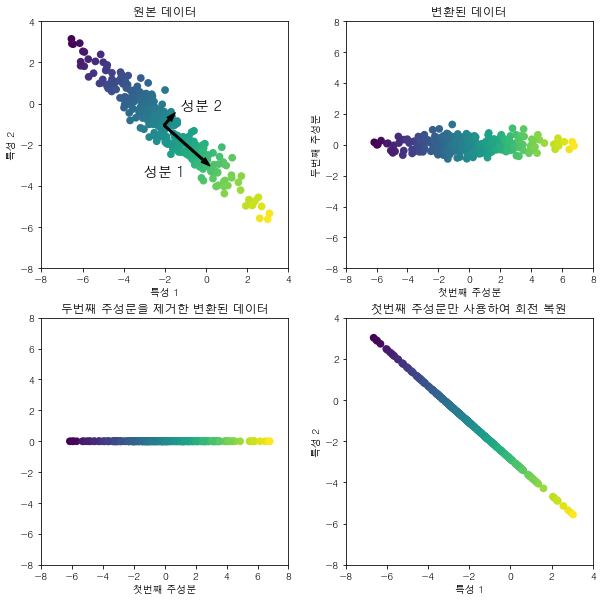

In [3]:
mglearn.plots.plot_pca_illustration()

1. 첫 번째 그래프는 원본 데이터 포인트를 색으로 구분해 표시한 것입니다.
    - '성분 1'이라고 쓰여 있는 분산이 가장 큰 방향을 찾습니다.  
      이 방향은 데이터에서 가장 많은 정보를 담고 있는 방향(특성들의 상관관계가 가장 큰 방향)입니다.  
    - 그 다음으로 첫 번째 방향과 직각인 방향 중 가장 많은 정보를 담은 방향을 찾습니다.  
    
-> 이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서 주성분이라고 합니다.  
    (일반적으로 원본 특성 갯수만큼의 주성분이 있습니다.)  

2. 두 번째 그래프는 같은 데이터지만 주성분 1과 2를 각각 x축과 y축에 나란하도록 회전한 것입니다.  
    - 회전하기 전에 데이터에서 평균을 빼서 중심을 원점에 맞췄습니다.  
    - PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행렬이 대각선 방향을 제외하고는 0이 됩니다.  
3. 세 번째 그래프는 주성분의 일부만 남기는 차원 축소 용도로 PCA를 사용했습니다.
    - 2차원 dataset에서 1차원 dataset으로 차원이 감소합니다.  
    (가장 유용한 방향을 찾아서 그 방향의 성분은 유지하는 것입니다.)  
4. 네 번째 그래프는 데이터에 다시 평균을 더하고 반대로 회전시킵니다.
    - 원래 특성 공간에서 첫 번째 주성분의 정보만 담고 있습니다.

### PCA를 적용해 유방암 dataset 시각화하기

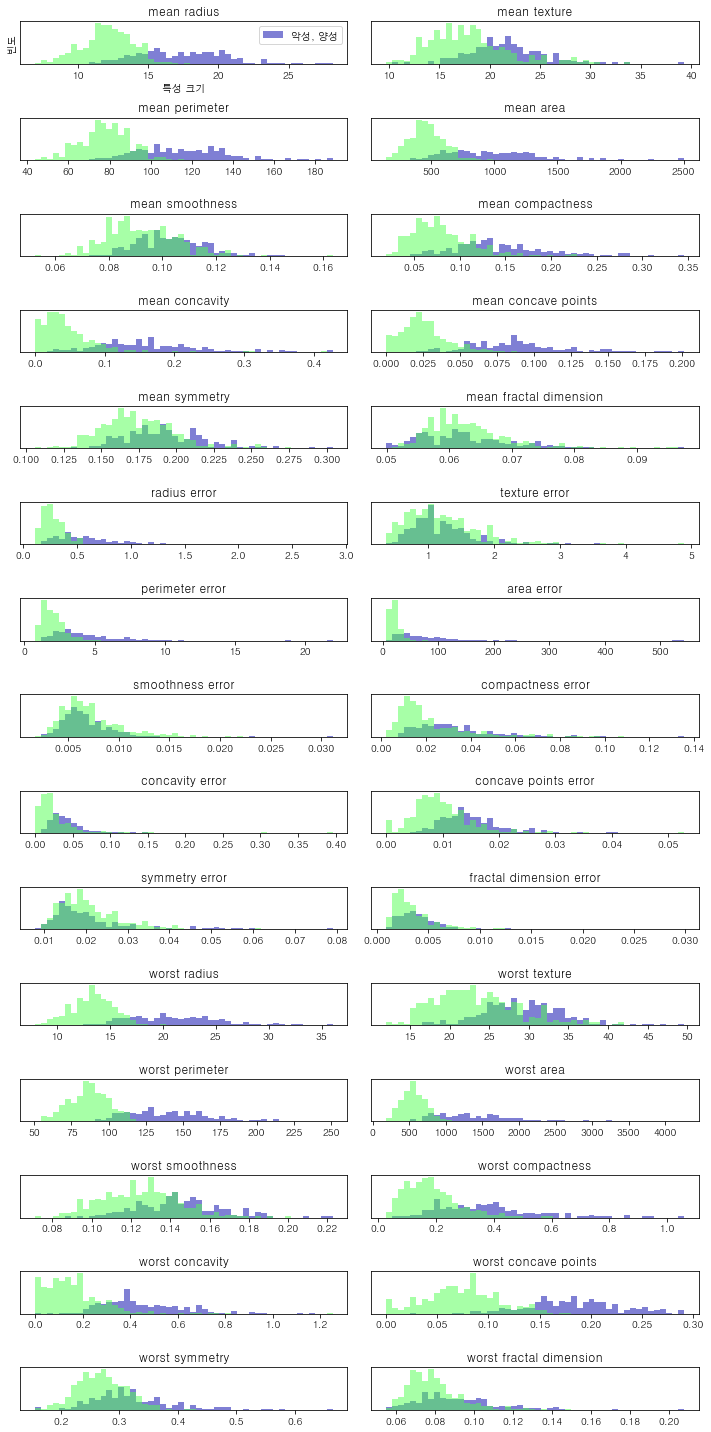

In [4]:
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize = (10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins = bins, color = mglearn.cm3(0), alpha = .5)
    ax[i].hist(benign[:, i], bins = bins, color = mglearn.cm3(2), alpha = .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성, 양성'], loc = 'best')
fig.tight_layout();

초록색은 양성 클래스, 푸른색은 악성 클래스를 나타냅니다.

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [6]:
from sklearn.decomposition import PCA

# 데이터의 처음 두 개 주성분만 유지시킵니다.
pca = PCA(n_components = 2)

# 유방암 데이터로 PCA 모델을 만듭니다.
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다.
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태 :", str(X_scaled.shape))
print("축소된 데이터 형태 :", str(X_pca.shape))

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


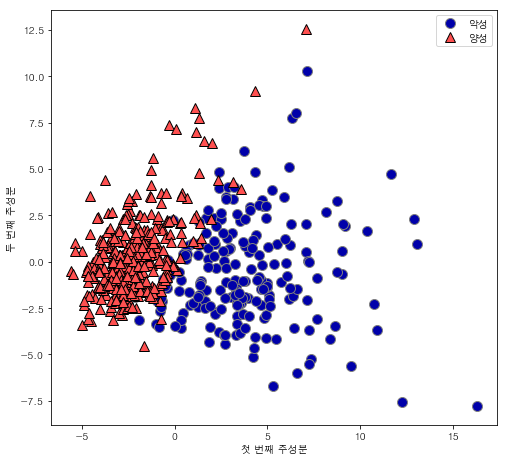

In [7]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize = (8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['악성', '양성'], loc = 'best')
plt.gca().set_aspect('equal')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분');

**PCA의 단점**은 그래프의 두 축을 해석하기가 쉽지 않다는 점입니다.  
주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태입니다.  
PCA 객체가 학습될 때 components_ 속성에 주성분이 저장됩니다.

In [8]:
print(" PCA 주성분 형태 :", pca.components_.shape)

 PCA 주성분 형태 : (2, 30)


In [9]:
print(" PCA 주성분 :\n", pca.components_)

 PCA 주성분 :
 [[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


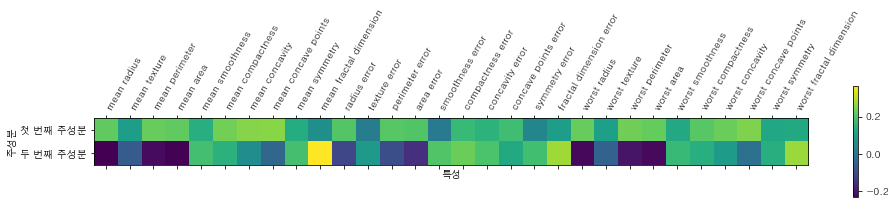

In [10]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0, 1], ['첫 번째 주성분', '두 번째 주성분'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation = 60, ha = 'left')
plt.xlabel('특성')
plt.ylabel('주성분');

### 고유얼굴(eigenface) 특성 추출

PCA를 이용하여 LFW dataset의 얼굴 이미지에서 특성을 추출하는 간단한 어플리케이션

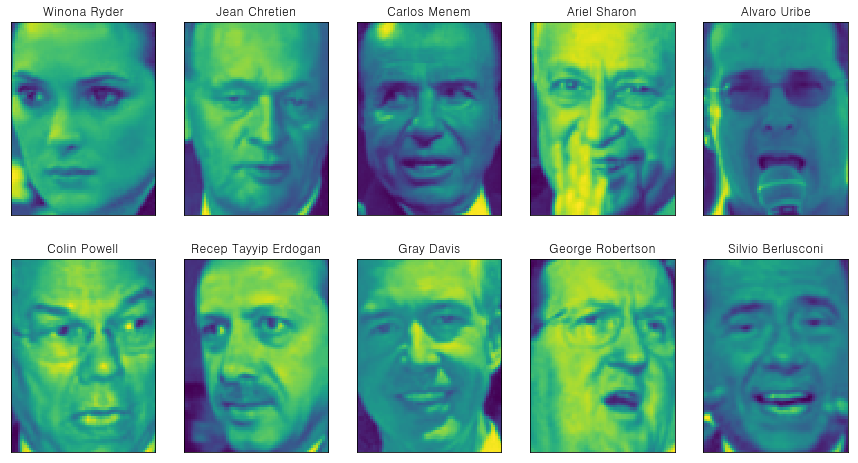

In [11]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {'xticks' : (), 'yticks' : ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target]);

LFW dataset에는 62명의 얼굴을 찍은 이미지가 총 3,023개가 있으며 각 이미지의 크기는 87x65픽셀입니다.

In [12]:
print("people.images.shape :", people.images.shape)
print("클래스 갯수 :", len(people.target_names))

people.images.shape : (3023, 87, 65)
클래스 갯수 : 62


In [13]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)

# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25}{1:#3}".format(name, count), end = '    ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo          39    Alvaro Uribe              35    Amelie Mauresmo           21    
Andre Agassi              36    Angelina Jolie            20    Ariel Sharon              77    
Arnold Schwarzenegger     42    Atal Bihari Vajpayee      24    Bill Clinton              29    
Carlos Menem              21    Colin Powell             236    David Beckham             31    
Donald Rumsfeld          121    George Robertson          22    George W Bush            530    
Gerhard Schroeder        109    Gloria Macapagal Arroyo   44    Gray Davis                26    
Guillermo Coria           30    Hamid Karzai              22    Hans Blix                 39    
Hugo Chavez               71    Igor Ivanov               20    Jack Straw                28    
Jacques Chirac            52    Jean Chretien             55    Jennifer Aniston          21    
Jennifer Capriati         42    Jennifer Lopez            21    Jeremy Greenstock         24    
Jiang Zemin               20  

데이터의 편중을 없애기 위해 사람마다 50개의 이미지만 선택

In [14]:
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정합니다.
# MinMaxScaler를 적용하는 것과 거의 같습니다.
X_people = X_people / 255.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)

# 이웃의 갯수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다.
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수 : {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수 : 0.23


PCA의 화이트닝 옵션을 사용해서 주성분의 스케일이 같아지도록 조정합니다.  
(화이트닝 옵션 없이 변환한 후에 StandardScaler 를 적용하는 것과 같읍)

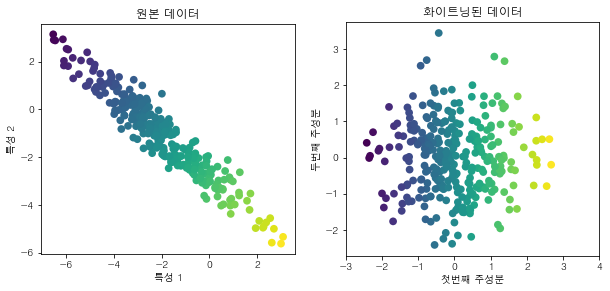

In [16]:
mglearn.plots.plot_pca_whitening()

In [17]:
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape :", X_train_pca.shape)

X_train_pca.shape : (1547, 100)


In [18]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도 : {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도 : 0.31


In [19]:
print("pca.components_.shape :", pca.components_.shape)

pca.components_.shape : (100, 5655)


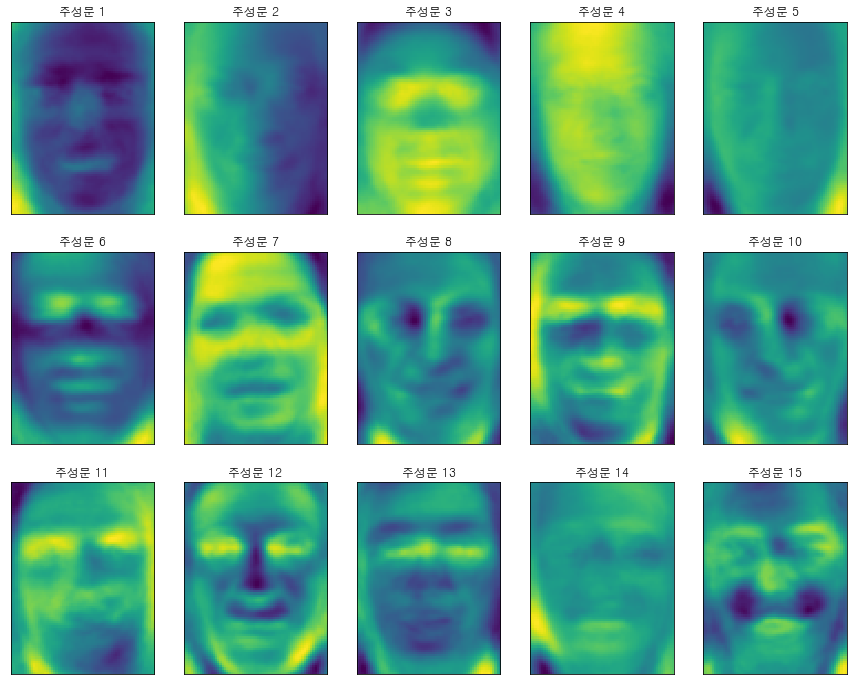

In [20]:
fig, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw = {'xticks' : (), 'yticks' : ()})
for i, (component, ax)in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap = 'viridis')
    ax.set_title('주성분 {}'.format((i + 1)));

첫 번째 주성분은 얼굴과 배경의 명암 차이를 기록한 것으로 보이고, 두 번째 주성분은 오른쪽과 왼쪽의 조명의 차이를 담고 있는 것 등  
몇몇 주성분이 잡아낸 얼굴 이미지의 특징을 짐작해볼 수 있습니다.

몇 개의 주성분으로 데이터를 줄이고 원래 특성 공간으로 되돌리는 작업은 inverse_transform 메서드를 사용합니다.

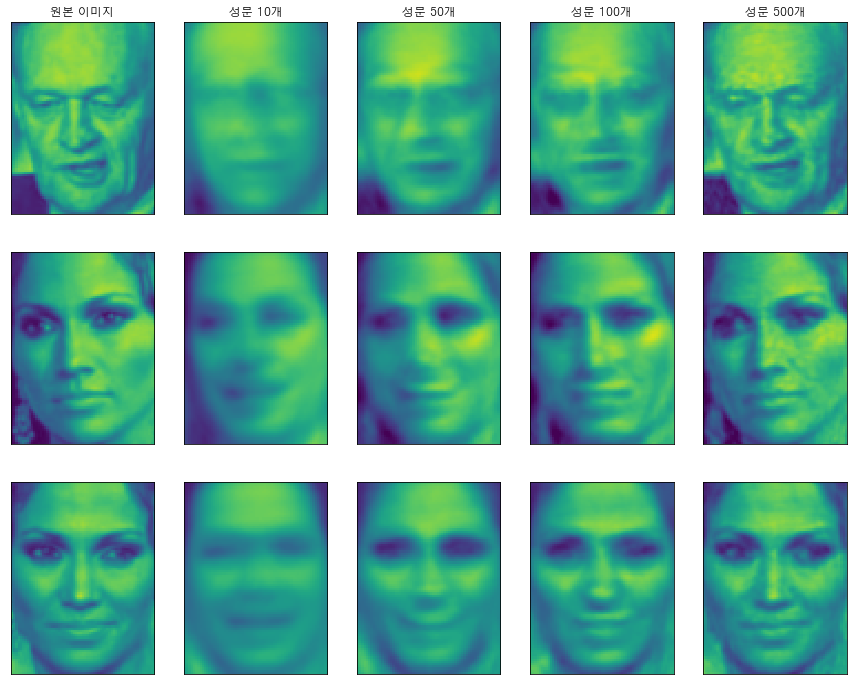

In [21]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

PCA의 처음 두 주성분을 이용해 전체 데이터를 누구의 얼굴인지 클래스로 구분해 산점도로 나타냈습니다.

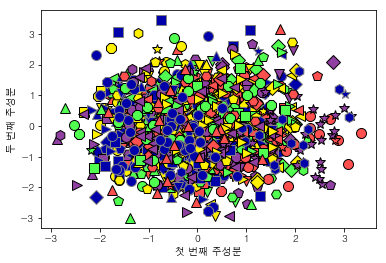

In [22]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분');

## 3.4.2 비음수 행렬 분해(NMF)

NMF(non-negative matrix factorization)는 유용한 특성을 뽑아내기 위한 또 다른 비지도 학습 알고리즘입니다.  
PCA와 비슷하고 차원 축소에도 사용할 수 있습니다.  
**but!** PCA에서는 데이터의 분산이 가장 크고 수직인 성분을 찾았다면 NMF에서는 음수가 아닌 성분과 계수 값을 찾습니다.  
-> 주성분과 계수가 모두 0보다 크거나 같아야 합니다.

### 인위적 데이터에 NMF 적용하기

PCA를 사용할 때와 달리 NMF로 데이터를 다루려면 주어진 데이터가 양수인지 확인해야 합니다.

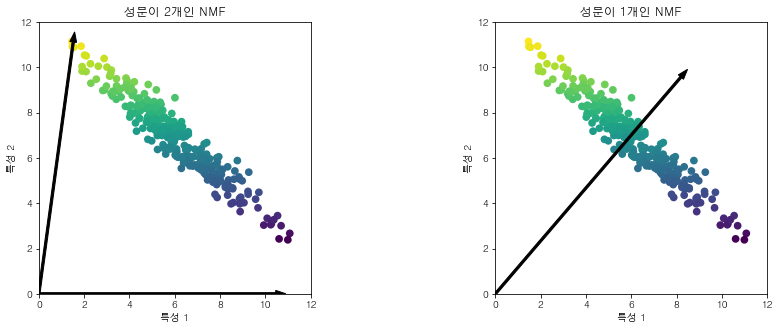

In [23]:
mglearn.plots.plot_nmf_illustration()

- 왼쪽은 성분이 둘인 NMF로, dataset의 모든 포인트를 양수로 이뤄진 두 개의 성분으로 표현할 수 있습니다.  
    (데이터가 특성 갯수만큼 많다면 알고리즘은 데이터의 각 특성의 끝에 위치한 포인트를 가리키는 방향을 선택할 것입니다.)
- 하나의 성분만을 사용한다면 NMF는 데이터를 가장 잘 표현할 수 있는 평균으로 향하는 성분을 만듭니다.  
    (PCA와는 반대로 성분 갯수를 줄이면 특정 방향이 제거되는 것뿐만이 아니라 전체 성분이 완전히 바뀝니다.)
- NMF는 무작위로 초기화하기 때문에 난수 생성 초깃값에 따라 결과가 달라집니다.

### 얼굴 이미지에 NMF 적용하기

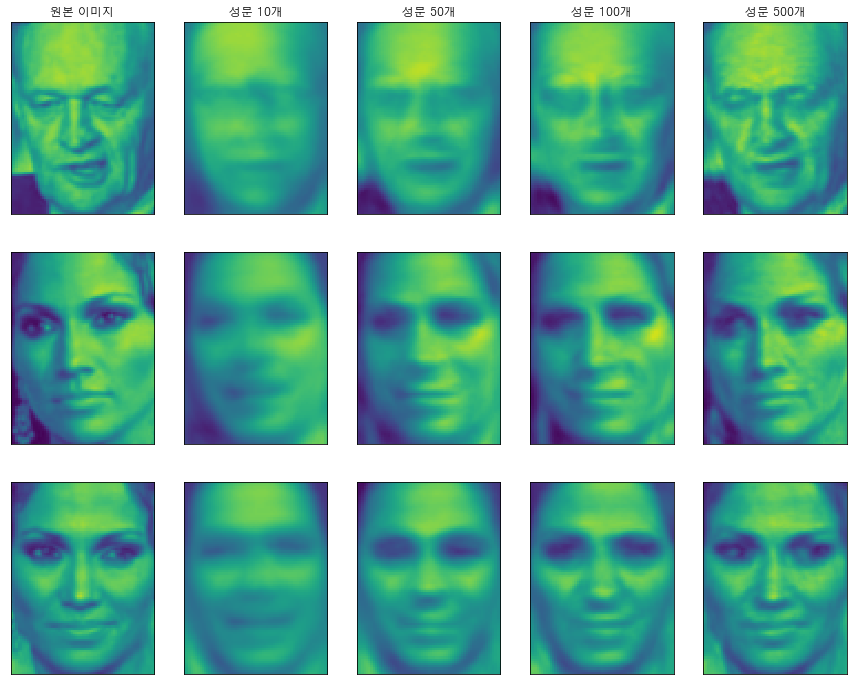

In [24]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

- 변환을 되돌린 결과는 PCA를 사용했을 때와 비슷하지만 품질이 떨어집니다.  
     (PCA가 재구성 측면에서 최선의 방향을 찾기 때문!!)
- NMF는 데이터를 인코딩하거나 재구성하는 용도로 사용하기보다는 주로 데이터에 있는 유용한 패턴을 찾는 데 활용합니다.

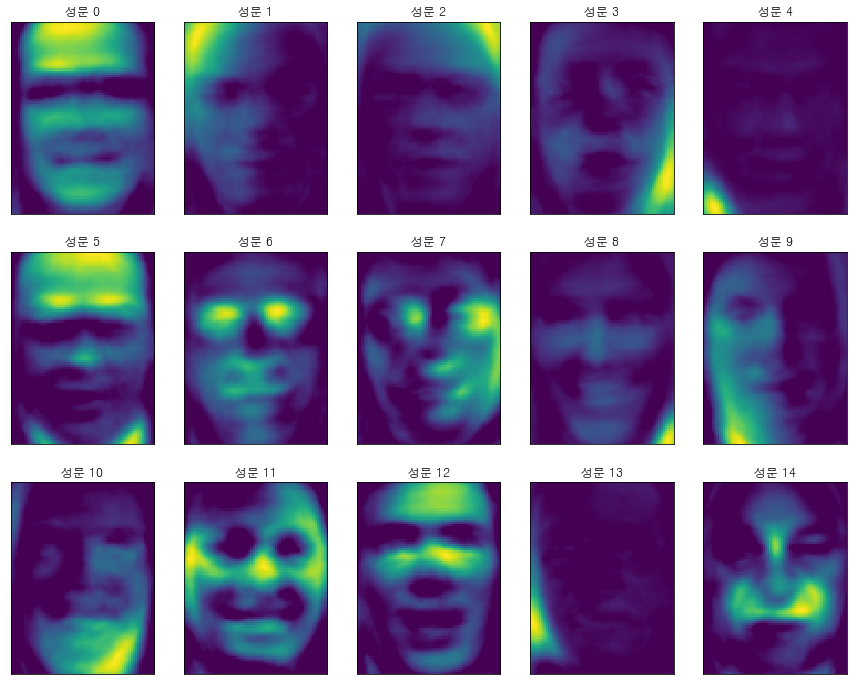

In [25]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 15, random_state = 0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw = {'xticks' : (), 'yticks' : ()})
for i, (component, ax)in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('성분 {}'.format((i)));

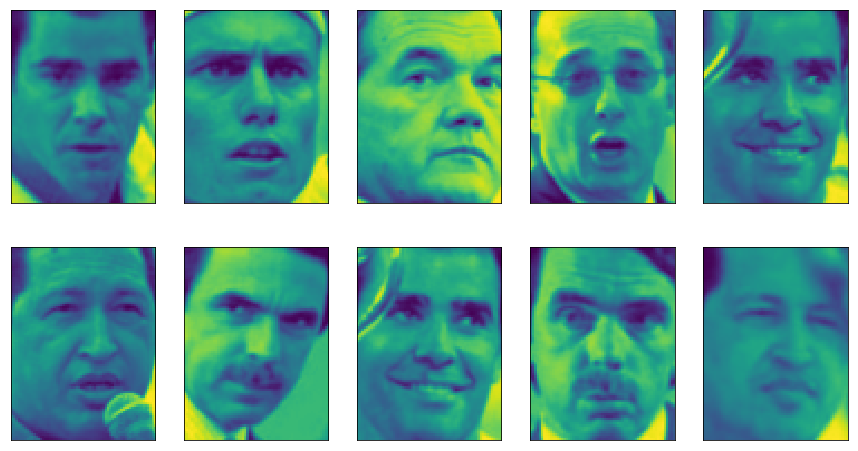

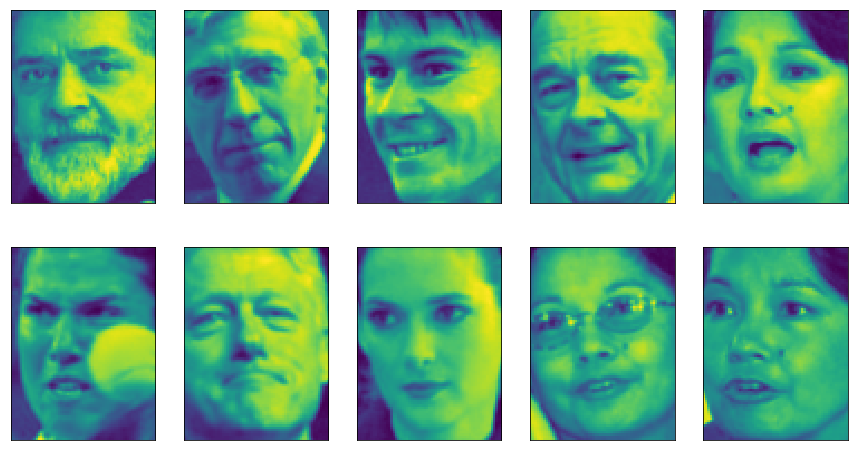

In [26]:
compn = 3

# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다.
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {'xticks' : (), 'yticks' : ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7

# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다.
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {'xticks' : (), 'yticks' : ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

성분 7에 대한 계수 값이 큰 얼굴들은 왼쪽으로 돌아가있고, 성분 3에 대한 계수 값이 큰 얼굴들은 오른쪽으로 돌아가 있습니다.

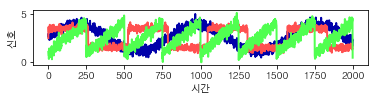

In [27]:
S = mglearn.datasets.make_signals()
plt.figure(figsize = (6, 1))
plt.plot(S, '-')
plt.xlabel('시간')
plt.ylabel('신호');

In [28]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만듭니다.
A = np.random.RandomState(0).uniform(size = (100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태 :", X.shape)

측정 데이터 형태 : (2000, 100)


In [29]:
# NMF를 이용하여 세 개의 신호를 복원합니다.
nmf = NMF(n_components = 3, random_state = 42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태 :", S_.shape)

복원한 신호 데이터 형태 : (2000, 3)


In [30]:
# 비교를 위해 PCA도 적용합니다.
pca = PCA(n_components = 3)
H = pca.fit_transform(X)

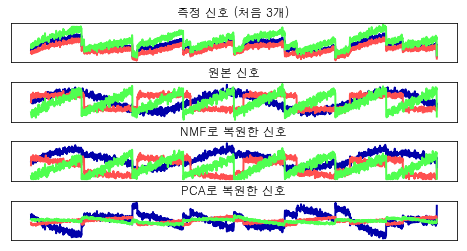

In [31]:
models = [X, S, S_, H]
names = ['측정 신호 (처음 3개)', '원본 신호', 'NMF로 복원한 신호', 'PCA로 복원한 신호']

fig, axes = plt.subplots(4, figsize = (8, 4), gridspec_kw = {'hspace' : .5}, subplot_kw = {'xticks' : (), 'yticks' : ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-');

NMF는 원본 신호를 잘 복원했지만 PCA는 실패했고 데이터 변동의 대부분을 첫 번째 성분을 사용해 나타냈습니다.  
NMF로 생성한 성분은 순서가 없음에 유념해야 합니다. (이 그래프에서 NMF 성분 순서가 원본 신호와 같지만 우연일 뿐입니다.)

## 3.4.3 t-SNE를 이용한 매니폴드 학습

매니폴드 학습 알고리즘이라고 하는 시각화 알고리즘들은 훨씬 복잡한 매핑을 만들어 더 나은 시각화를 제공합니다.  
**특히 t-SNE 알고리즘을 아주 많이 사용합니다.**  

매니폴드 학습 알고리즘은 목적이 시각화라 3개 이상의 특성을 뽑는 경우는 거의 없습니다.  
t-SNE를 포함해서 일부 매니폴드 알고리즘들은 훈련 데이터를 새로운 표현으로 변환시키지만 새로운 데이터에는 적용하지 못합니다.  
(테스트 세트에는 적용할 수 없고 훈련했던 데이터만 변환할 수 있음)  
-> 매니폴드 학습은 탐색적 데이터 분석에 유용하지만 지도 학습용으로는 거의 사용하지 않습니다.  

t-SNE의 아이디어는 **데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것**입니다.  
(이웃 데이터 포인트에 대한 정보를 보존하려 노력함)

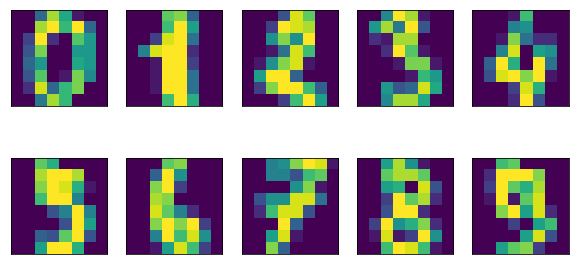

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize = (10, 5), subplot_kw = {'xticks' : (), 'yticks' : ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

PCA를 사용해 데이터를 2차원으로 축소해 시각화

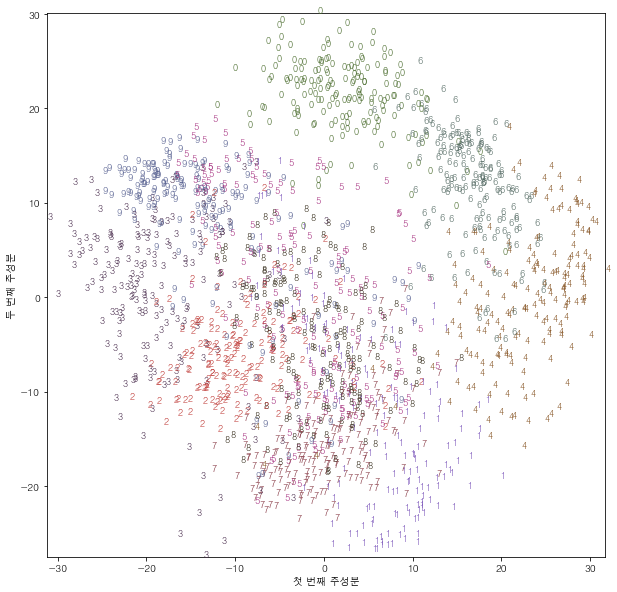

In [33]:
# PCA 모델을 생성합니다.
pca = PCA(n_components = 2)
pca.fit(digits.data)

# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다.
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525', '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']
plt.figure(figsize = (10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다.
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]], fontdict = {'weight' : 'bold', 'size' : 9})
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분');

같은 dataset에 t-SNE를 적용

In [34]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42)

# TNSE에는 transform 메서드가 없으므로 대신 fit_transform을 사용합니다.
digits_tsne = tsne.fit_transform(digits.data)

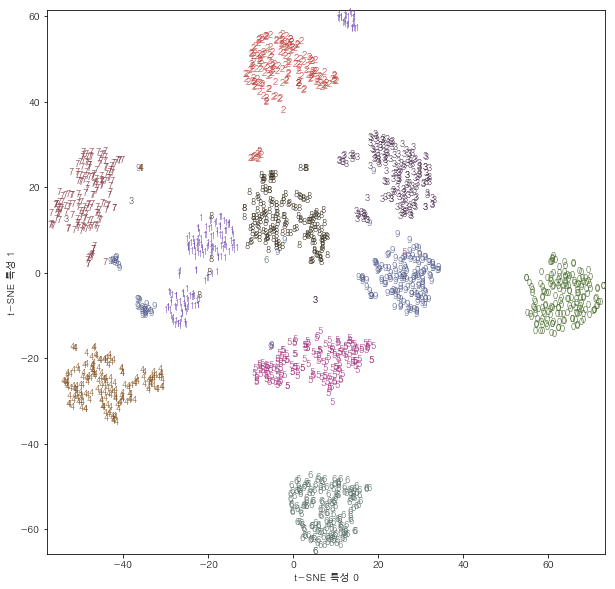

In [35]:
plt.figure(figsize = (10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다.
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]], fontdict = {'weight' : 'bold', 'size' : 9})
    
plt.xlabel('t-SNE 특성 0')
plt.ylabel('t-SNE 특성 1');

모든 클래스가 확실히 잘 구분되었습니다.  
이 알고리즘은 클래스 레이블 정보를 사용하지 않으므로 완전한 비지도 학습입니다.  
그럼에도 원본 데이터 공간에서 포인트들이 얼마나 가까이 있는지에 대한 정보로 클래스가 잘 구분되는 2차원 표현을 찾습니다.  

t-SNE는 매개변수를 약간 조정해야 하지만 기본값으로도 잘 작동하는 경우가 많습니다.